In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
  
import warnings
warnings.filterwarnings('ignore')

In [99]:
PATH = 'spaceship-titanic'
df = pd.read_csv(f'{PATH}/train.csv')
df_test = pd.read_csv(f'{PATH}/test.csv')

In [100]:
col = df.loc[:,'RoomService':'VRDeck'].columns
col_test = df_test.loc[:,'RoomService':'VRDeck'].columns

df.groupby('VIP')[col].mean()
df_test.groupby('VIP')[col_test].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,215.76,405.71,174.27,274.94,291.33
True,519.91,1747.38,343.61,1403.83,1131.24


In [101]:
df.groupby('CryoSleep')[col].mean()
df_test.groupby('CryoSleep')[col_test].mean()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,347.10,701.53,281.57,474.51,493.67
True,0.00,0.00,0.00,0.00,0.00


In [102]:
temp = df['CryoSleep'] == True
df.loc[temp, col] = 0.0

temp = df_test['CryoSleep'] == True
df_test.loc[temp, col_test] = 0.0

In [103]:
for c in col:
	for val in [True, False]:
		temp = df['VIP'] == val
		k = df[temp].mean()
		df.loc[temp, c] = df.loc[temp, c].fillna(k)

for c in col_test:
	for val in [True, False]:
		temp = df_test['VIP'] == val
		k = df_test[temp].mean()
		df_test.loc[temp, c] = df_test.loc[temp, c].fillna(k)		

In [104]:
col = 'HomePlanet'
temp = df['VIP'] == False
df.loc[temp, col] = df.loc[temp, col].fillna('Earth')

temp = df['VIP'] == True
df.loc[temp, col] = df.loc[temp, col].fillna('Europa')

col_test = 'HomePlanet'
temp = df_test['VIP'] == False
df_test.loc[temp, col_test] = df_test.loc[temp, col_test].fillna('Earth')

temp = df_test['VIP'] == True
df_test.loc[temp, col_test] = df_test.loc[temp, col_test].fillna('Europa')

In [105]:
temp = df[df['Age'] < 61]['Age'].mean()
df['Age'] = df['Age'].fillna(temp)

temp = df_test[df_test['Age'] < 61]['Age'].mean()
df_test['Age'] = df_test['Age'].fillna(temp)

In [106]:
for col in df.columns:
    # Check for null values presence
    if df[col].isnull().sum() == 0:
        continue
          
    # If the data type is categorical filling by mode.
    if df[col].dtype == object or df[col].dtype == bool:
        df[col] = df[col].fillna(df[col].mode()[0])
          
    # Else by mean
    else:
        df[col] = df[col].fillna(df[col].mean())
  
df.isnull().sum().sum()


for col in df_test.columns:
    # Check for null values presence
    if df_test[col].isnull().sum() == 0:
        continue
          
    # If the data type is categorical filling by mode.
    if df_test[col].dtype == object or df_test[col].dtype == bool:
        df_test[col] = df_test[col].fillna(df_test[col].mode()[0])
          
    # Else by mean
    else:
        df_test[col] = df_test[col].fillna(df_test[col].mean())
  
df_test.isnull().sum().sum()

0

In [107]:
new = df["PassengerId"].str.split("_", n=1, expand=True)
df["RoomNo"] = new[0].astype(int)
df["PassengerNo"] = new[1].astype(int)
  
df.drop(['PassengerId', 'Name'],
        axis=1, inplace=True)

new = df_test["PassengerId"].str.split("_", n=1, expand=True)
df_test["RoomNo"] = new[0].astype(int)
df_test["PassengerNo"] = new[1].astype(int)
  
df_test.drop(['PassengerId', 'Name'],
        axis=1, inplace=True)

In [108]:
data = df['RoomNo']
for i in range(df.shape[0]):
    temp = data == data[i]
    df['PassengerNo'][i] = (temp).sum()

data_test = df_test['RoomNo']
for i in range(df_test.shape[0]):
    temp = data_test == data_test[i]
    df_test['PassengerNo'][i] = (temp).sum()    

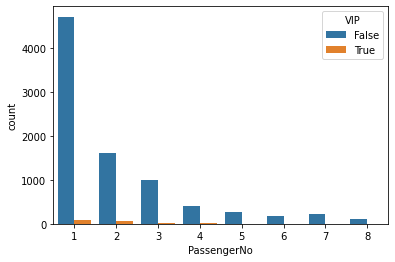

In [109]:
df.drop(['RoomNo'], axis=1,
		inplace=True)
df_test.drop(['RoomNo'], axis=1,
		inplace=True)
sb.countplot(data=df,
			x = 'PassengerNo',
			hue='VIP')
plt.show()

In [110]:
new = df["Cabin"].str.split("/", n=2, expand=True)
data["F1"] = new[0]
df["F2"] = new[1].astype(int)
df["F3"] = new[2]

df.drop(['Cabin'], axis=1,
		inplace=True)

new_test = df_test["Cabin"].str.split("/", n=2, expand=True)
data_test["F1"] = new_test[0]
df_test["F2"] = new_test[1].astype(int)
df_test["F3"] = new_test[2]

df_test.drop(['Cabin'], axis=1,
		inplace=True)		

In [111]:
df['LeasureBill'] = df['RoomService'] + df['FoodCourt']\
+ df['ShoppingMall'] + df['Spa'] + df['VRDeck']

df_test['LeasureBill'] = df_test['RoomService'] + df_test['FoodCourt']\
+ df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']

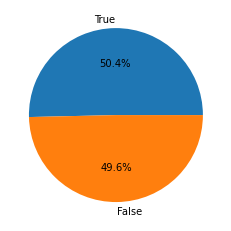

In [112]:
x = df['Transported'].value_counts()
plt.pie(x.values,
		labels=x.index,
		autopct='%1.1f%%')
plt.show()

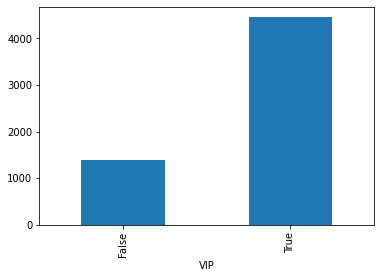

In [113]:
df.groupby('VIP').mean()['LeasureBill'].plot.bar()
plt.show()

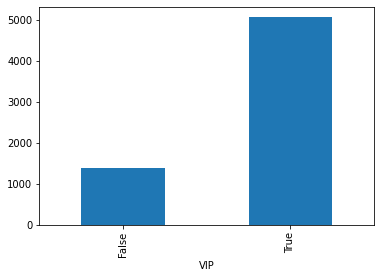

In [114]:
df_test.groupby('VIP').mean()['LeasureBill'].plot.bar()
plt.show()

In [115]:
for col in df.columns:
	# In case of categorical column
	# encode them
	if df[col].dtype == object:
		le = LabelEncoder()
		df[col] = le.fit_transform(df[col])

	# In case of boolean data type
	# convert them to binary
	if df[col].dtype == 'bool':
		df[col] = df[col].astype(int)

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerNo,F2,F3,LeasureBill
0,1,0,2,39.00,0,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0.00
1,0,0,2,24.00,0,109.00,9.00,25.00,549.00,44.00,1,1,0,1,736.00
2,1,0,2,58.00,1,43.00,3576.00,0.00,6715.00,49.00,0,2,0,1,10383.00
3,1,0,2,33.00,0,0.00,1283.00,371.00,3329.00,193.00,0,2,0,1,5176.00
4,0,0,2,16.00,0,303.00,70.00,151.00,565.00,2.00,1,1,1,1,1091.00


In [116]:
for col in df_test.columns:
	# In case of categorical column
	# encode them
	if df_test[col].dtype == object:
		le = LabelEncoder()
		df_test[col] = le.fit_transform(df_test[col])

	# In case of boolean data type
	# convert them to binary
	if df_test[col].dtype == 'bool':
		df_test[col] = df_test[col].astype(int)

df_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerNo,F2,F3,LeasureBill
0,0,1,2,27.00,0,0.00,0.00,0.00,0.00,0.00,1,3,1,0.00
1,0,0,2,19.00,0,0.00,9.00,0.00,2823.00,0.00,1,4,1,2832.00
2,1,1,0,31.00,0,0.00,0.00,0.00,0.00,0.00,1,0,1,0.00
3,1,0,2,38.00,0,0.00,6652.00,0.00,181.00,585.00,1,1,1,7418.00
4,0,0,2,20.00,0,10.00,0.00,635.00,0.00,0.00,1,5,1,645.00


In [117]:
features = df.drop(['Transported'], axis=1)
target = df.Transported

In [122]:
from lazypredict.Supervised import LazyClassifier

# X_train.shape, y_train.shape, X_test.shape
x_tr, x_ts, y_tr, y_ts = train_test_split(features, target, test_size=0.5, random_state=0)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_tr, x_ts, y_tr, y_ts)

print(models)

100%|██████████| 29/29 [00:11<00:00,  2.54it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.79               0.79     0.79      0.79   
LogisticRegression                 0.79               0.79     0.79      0.79   
LGBMClassifier                     0.79               0.79     0.79      0.79   
ExtraTreesClassifier               0.79               0.79     0.79      0.79   
XGBClassifier                      0.79               0.79     0.79      0.79   
CalibratedClassifierCV             0.78               0.78     0.78      0.78   
SVC                                0.78               0.78     0.78      0.78   
LinearSVC                          0.78               0.78     0.78      0.78   
AdaBoostClassifier                 0.78               0.78     0.78      0.78   
NuSVC                              0.78               0.78     0.78      0.78   
SGDClassifier               

In [125]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
top_accuracy = 0
top_value_x = 0
top_value_y = 0
top_model = 0
top_x_values = [] # [7, 4, 6, 11, 12, 19, 20, 22, 29, 30, 47]
top_y_values = [] # [31, 11, 12, 22, 14, 20, 23, 29, 41, 24, 22]

# for value_x in np.arange(1, 100+1, 1):
#     for value_y in np.arange(1, 100+1, 1):
value_x = 69
value_y = 55
value_z = 10

for value_x in np.arange(50, 100+1, 1):
    for value_y in np.arange(50, 100+1, 1):
        for value_z in np.arange(2, 20+1, 1):
            # Random Forest Classifier
            random_forest = RandomForestClassifier(n_estimators=value_x, 
                                                criterion='gini',
                                                max_depth=value_y,
                                                min_samples_split=value_z)

            random_forest.fit(x_tr, y_tr)
            y_pred = random_forest.predict(x_ts)
            random_forest.score(x_tr, y_tr)   
            acc_random_forest = round(metrics.accuracy_score(y_pred, y_ts) * 100, 2)
            if acc_random_forest > top_accuracy:
                for i in range(50):
                    random_forest = RandomForestClassifier(n_estimators=value_x, 
                                                criterion='gini',
                                                max_depth=value_y,
                                                min_samples_split=value_z)
                    random_forest.fit(x_tr, y_tr)
                    y_pred = random_forest.predict(x_ts)
                    random_forest.score(x_tr, y_tr)   
                    acc_random_forest = round(metrics.accuracy_score(y_pred, y_ts) * 100, 2)
                    if acc_random_forest > top_accuracy:
                        top_accuracy = acc_random_forest
                        top_value_x = value_x
                        top_value_y = value_y
                        top_value_z = value_z
                        # top_x_values.append(top_value_x)
                        # top_y_values.append(top_value_y)
                        top_model = random_forest

            print(f'{value_z = :3d}, {acc_random_forest = :2.2f} %, {top_value_z = :2d}, {top_accuracy = :2.2f} %', end='\r')


In [123]:
# top_x_values = [7, 4, 6, 11, 12, 19, 20, 22, 29, 30, 47]
# top_y_values = [31, 11, 12, 22, 14, 20, 23, 29, 41, 24, 22]
top_accuracy = 0
# for x_value, y_value in zip(top_x_values[5:], top_y_values[5:]):
value_x = 69
value_y = 55
value_z = 10

for i in range(1, 3000+1):
    # Random Forest Classifier
    random_forest = RandomForestClassifier(n_estimators=value_x, 
                                        criterion='gini',
                                        max_depth=value_y,
                                        min_samples_split=value_z)
    random_forest.fit(x_tr, y_tr)
    y_pred = random_forest.predict(x_ts)
    random_forest.score(x_tr, y_tr)   
    acc_random_forest = round(metrics.accuracy_score(y_pred, y_ts) * 100, 2)

    if acc_random_forest > top_accuracy:
        top_accuracy = acc_random_forest  
        
        top_model = random_forest                 
    
    print(f'{i:4d}/3000, {acc_random_forest = :2.2f} %, {top_accuracy = :2.2f} %', end='\r')

In [124]:
# X_test = pd.read_csv('spaceship-titanic/test.csv')
y_pred = pd.Series(top_model.predict(df_test))
# top_model.score(x_tr, y_tr)   
# acc_random_forest = round(metrics.accuracy_score(y_pred, y_ts) * 100, 2)
sample_df = pd.read_csv('spaceship-titanic/sample_submission.csv')

y_pred.loc[(y_pred == 1)]= 'True'
y_pred.loc[(y_pred == 0)]= 'False'

submission = pd.DataFrame({
        "PassengerId": sample_df["PassengerId"],
        "Transported": y_pred
    })
submission.to_csv('submission2.csv', index=False)
print('Saved submission!')

Saved submission!
